# Data from Jeremy

November 2022


- last update December 5th 2022

   voici mes slides et la base de données des fit atmosphériques. Elle est au format csv et s'ouvre bien avec pandas. Il y a beaucoup de paramètres en double, comme l'eau PWV, car soit ce paramètre à été obtenu en ajustant un spectre sur un spectre, soit directement le spectrogramme via le forward model.  Les premiers ont des titres de colonnes en _y et les seconds en _x (c'est pandas qui a choisi...). Pour faire les plots PWV(t) de la présentation, je filtre les bonnes données comme ceci :

    filters = set(df["FILTER"])

    for filt in filters:
        indices = (df["FILTER"]==filt) & (df["chi2_y"]<20) & (df["chi2_x"]<20) & (df["reso [pix]"]<5) & (df["reso [pix]_err"]<5)

    où "reso [pix]" est le noyau gaussien par lequel je convolue les spectres (pas les spectrogrammes)

    Voilà je pense que vous savez tout, 


In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
#path="/sps/lsst/groups/auxtel/MERRA2/auxtel/jeremy_Nov2022/data_jeremy"
path="data/data_jeremy"
filename="auxtel_atmosphere_2022.csv"
filename_in="auxtel_atmosphere_2022.hdf"

In [3]:
! ls ../../MergeDataSets/datasets_2022 

MERRA2_2022_M2I1NXASM_M2T1NXAER_M2T1NXRAD_lsst_AllYear.csv
MERRA2_2022_inst1_2d_asm_Nx_M2I1NXASM_lsst_AllYear.csv
MERRA2_2022_tavg1_2d_aer_Nx_M2T1NXAER_lsst_AllYear.csv
MERRA2_2022_tavg1_2d_rad_Nx_M2T1NXRAD_lsst_AllYear.csv


In [4]:
merra2_path="../../MergeDataSets/datasets_2022"
merra2_filename="MERRA2_2022_M2I1NXASM_M2T1NXAER_M2T1NXRAD_lsst_AllYear.csv" 

In [5]:
merra2_fullfilename=os.path.join(merra2_path,merra2_filename)
df_m=pd.read_csv(merra2_fullfilename)

In [6]:
df_m.sort_values(by='time', inplace=True)

In [7]:
my_format = '%Y-%m-%d %H:%M:%S'

In [8]:
df_m["timem"] = [ pd.to_datetime(thedatetime,format=my_format) for thedatetime in df_m['time'].values]

In [9]:
df_m.set_index(['timem'],inplace=True)

In [10]:
df_m

,time,PS,TQV,TO3,TOTEXTTAU,TOTANGSTR,TOTSCATAU,TAUTOT,TAUHGH,TAUMID,TAULOW
timem,,,,,,,,,,,
2022-01-01 00:00:00,2022-01-01 00:00:00,78373.930,4.601702,257.98914,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 00:30:00,2022-01-01 00:30:00,NaN,NaN,NaN,0.038421,1.340653,0.035518,0.0,0.0,0.0,0.0
2022-01-01 01:00:00,2022-01-01 01:00:00,78367.740,4.115004,258.31482,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 01:30:00,2022-01-01 01:30:00,NaN,NaN,NaN,0.035196,1.392255,0.032427,0.0,0.0,0.0,0.0
2022-01-01 02:00:00,2022-01-01 02:00:00,78367.800,3.729155,258.89682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31 21:30:00,2022-10-31 21:30:00,NaN,NaN,NaN,0.036404,1.303971,0.033254,0.0,0.0,0.0,0.0
2022-10-31 22:00:00,2022-10-31 22:00:00,78361.695,3.294081,290.72327,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-31 22:30:00,2022-10-31 22:30:00,NaN,NaN,NaN,0.035611,1.315245,0.032468,0.0,0.0,0.0,0.0


In [11]:
fullfilename=os.path.join(path,filename)
#fullfilename_in=os.path.join(path,filename_in)

In [12]:
df=pd.read_csv(fullfilename)
#df=pd.read_hdf(fullfilename_in,'df')

In [13]:
df.head()

,DATE-OBS,SIMPLE,BITPIX,NAXIS,NAXIS1,NAXIS2,EXTEND,DATE,MJD,CCD_MANU,...,eta_gauss_1_err,eta_gauss_2,eta_gauss_2_err,stddev_0,stddev_0_err,stddev_1,stddev_1_err,stddev_2,stddev_2_err,filename
0,2022-06-29 01:30:09.184,True,-64,2,694,3,True,2022-06-29T01:30:09.184,59759.062606,ITL,...,0.010,-0.270,0.010,1.162,0.004,-0.253,0.009,-0.160,0.010,outputs/FELH0600~holo4_003/20220628/exposure_2...
1,2022-06-29 01:30:52.191,True,-64,2,694,3,True,2022-06-29T01:30:52.191,59759.063104,ITL,...,0.010,0.290,0.010,1.009,0.003,NaN,NaN,NaN,NaN,outputs/FELH0600~holo4_003/20220628/exposure_2...
2,2022-06-29 01:31:35.094,True,-64,2,694,3,True,2022-06-29T01:31:35.094,59759.063601,ITL,...,0.008,-0.150,0.010,1.231,0.004,-0.195,0.007,-0.049,0.009,outputs/FELH0600~holo4_003/20220628/exposure_2...
3,2022-06-29 01:48:02.467,True,-64,2,694,3,True,2022-06-29T01:48:02.467,59759.075029,ITL,...,0.007,-0.135,0.010,0.953,0.003,-0.211,0.005,-0.019,0.006,outputs/FELH0600~holo4_003/20220628/exposure_2...
4,2022-06-29 01:48:45.479,True,-64,2,694,3,True,2022-06-29T01:48:45.479,59759.075526,ITL,...,0.010,0.105,0.009,1.185,0.003,NaN,NaN,NaN,NaN,outputs/FELH0600~holo4_003/20220628/exposure_2...


In [14]:
#df.to_hdf(filename_out,'df', mode='w')

In [15]:
#for name in df.columns:
#    print(name)

In [16]:
#df["FILTER"].values

In [17]:
filters = set(df["FILTER"])

all_filters = []
all_indexes = []

for filt in ['FELH0600','empty_1',np.nan]:
    all_filters.append(filt)
    if filt == 'FELH0600':
        indices = (df["FILTER"]==filt) & (df["chi2_y"]<20) & (df["chi2_x"]<20) & (df["reso [pix]"]<5) & (df["reso [pix]_err"]<5)
    elif filt == 'empty_1':
        indices = (df["FILTER"]==filt)
    else:
        indices = (df["FILTER"]==np.nan)
        
        
    all_indexes.append(indices)
  

In [18]:
np.where(all_indexes[0].values)

(array([  0,   1,   2,   3,   4,   5,   6,  10,  11,  12,  15,  16,  17,
         18,  19,  20,  21,  22,  23,  24,  27,  28,  31,  32,  33,  34,
         35,  36,  37,  39,  40,  42,  43,  44,  45,  46,  47,  49,  50,
         51,  52,  53,  54,  55,  56,  57,  58,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  92,  94,
         95,  96,  98,  99, 100, 101, 102, 103, 105, 106, 107, 111, 112,
        113, 114, 117, 118, 120, 122, 123, 124, 125, 126, 128, 129, 131,
        132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145,
        146, 147, 148, 149]),)

In [19]:
np.where(all_indexes[1].values)

(array([176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188,
        189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 202, 203]),)

In [20]:
np.where(all_indexes[2].values)

(array([], dtype=int64),)

## Choose the filter

In [21]:
filter_index=0
filter_name=all_filters[filter_index]

In [22]:
all_indexes[filter_index]

0       True
1       True
2       True
3       True
4       True
       ...  
533    False
534    False
535    False
536    False
537    False
Length: 538, dtype: bool

In [23]:
df=df.loc[all_indexes[filter_index]]
df

,DATE-OBS,SIMPLE,BITPIX,NAXIS,NAXIS1,NAXIS2,EXTEND,DATE,MJD,CCD_MANU,...,eta_gauss_1_err,eta_gauss_2,eta_gauss_2_err,stddev_0,stddev_0_err,stddev_1,stddev_1_err,stddev_2,stddev_2_err,filename
0,2022-06-29 01:30:09.184,True,-64,2,694,3,True,2022-06-29T01:30:09.184,59759.062606,ITL,...,0.010,-0.270,0.010,1.162,0.004,-0.253,0.009,-0.160,0.010,outputs/FELH0600~holo4_003/20220628/exposure_2...
1,2022-06-29 01:30:52.191,True,-64,2,694,3,True,2022-06-29T01:30:52.191,59759.063104,ITL,...,0.010,0.290,0.010,1.009,0.003,NaN,NaN,NaN,NaN,outputs/FELH0600~holo4_003/20220628/exposure_2...
2,2022-06-29 01:31:35.094,True,-64,2,694,3,True,2022-06-29T01:31:35.094,59759.063601,ITL,...,0.008,-0.150,0.010,1.231,0.004,-0.195,0.007,-0.049,0.009,outputs/FELH0600~holo4_003/20220628/exposure_2...
3,2022-06-29 01:48:02.467,True,-64,2,694,3,True,2022-06-29T01:48:02.467,59759.075029,ITL,...,0.007,-0.135,0.010,0.953,0.003,-0.211,0.005,-0.019,0.006,outputs/FELH0600~holo4_003/20220628/exposure_2...
4,2022-06-29 01:48:45.479,True,-64,2,694,3,True,2022-06-29T01:48:45.479,59759.075526,ITL,...,0.010,0.105,0.009,1.185,0.003,NaN,NaN,NaN,NaN,outputs/FELH0600~holo4_003/20220628/exposure_2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2022-07-01 05:51:27.918,True,-64,2,690,3,True,2022-07-01T05:51:27.918,59761.244073,ITL,...,0.030,-0.190,0.040,0.800,0.100,NaN,NaN,NaN,NaN,outputs/FELH0600~holo4_003/20220630/exposure_2...
146,2022-07-01 06:11:54.773,True,-64,2,690,3,True,2022-07-01T06:11:54.773,59761.258273,ITL,...,0.009,-0.140,0.010,1.215,0.007,NaN,NaN,NaN,NaN,outputs/FELH0600~holo4_003/20220630/exposure_2...
147,2022-07-01 06:12:37.759,True,-64,2,690,3,True,2022-07-01T06:12:37.759,59761.258770,ITL,...,0.006,-0.606,0.009,0.996,0.005,NaN,NaN,NaN,NaN,outputs/FELH0600~holo4_003/20220630/exposure_2...
148,2022-07-01 06:33:42.188,True,-64,2,690,3,True,2022-07-01T06:33:42.188,59761.273405,ITL,...,0.020,0.054,0.009,NaN,NaN,NaN,NaN,NaN,NaN,outputs/FELH0600~holo4_003/20220630/exposure_2...


In [24]:
df.sort_index()

,DATE-OBS,SIMPLE,BITPIX,NAXIS,NAXIS1,NAXIS2,EXTEND,DATE,MJD,CCD_MANU,...,eta_gauss_1_err,eta_gauss_2,eta_gauss_2_err,stddev_0,stddev_0_err,stddev_1,stddev_1_err,stddev_2,stddev_2_err,filename
0,2022-06-29 01:30:09.184,True,-64,2,694,3,True,2022-06-29T01:30:09.184,59759.062606,ITL,...,0.010,-0.270,0.010,1.162,0.004,-0.253,0.009,-0.160,0.010,outputs/FELH0600~holo4_003/20220628/exposure_2...
1,2022-06-29 01:30:52.191,True,-64,2,694,3,True,2022-06-29T01:30:52.191,59759.063104,ITL,...,0.010,0.290,0.010,1.009,0.003,NaN,NaN,NaN,NaN,outputs/FELH0600~holo4_003/20220628/exposure_2...
2,2022-06-29 01:31:35.094,True,-64,2,694,3,True,2022-06-29T01:31:35.094,59759.063601,ITL,...,0.008,-0.150,0.010,1.231,0.004,-0.195,0.007,-0.049,0.009,outputs/FELH0600~holo4_003/20220628/exposure_2...
3,2022-06-29 01:48:02.467,True,-64,2,694,3,True,2022-06-29T01:48:02.467,59759.075029,ITL,...,0.007,-0.135,0.010,0.953,0.003,-0.211,0.005,-0.019,0.006,outputs/FELH0600~holo4_003/20220628/exposure_2...
4,2022-06-29 01:48:45.479,True,-64,2,694,3,True,2022-06-29T01:48:45.479,59759.075526,ITL,...,0.010,0.105,0.009,1.185,0.003,NaN,NaN,NaN,NaN,outputs/FELH0600~holo4_003/20220628/exposure_2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2022-07-01 05:51:27.918,True,-64,2,690,3,True,2022-07-01T05:51:27.918,59761.244073,ITL,...,0.030,-0.190,0.040,0.800,0.100,NaN,NaN,NaN,NaN,outputs/FELH0600~holo4_003/20220630/exposure_2...
146,2022-07-01 06:11:54.773,True,-64,2,690,3,True,2022-07-01T06:11:54.773,59761.258273,ITL,...,0.009,-0.140,0.010,1.215,0.007,NaN,NaN,NaN,NaN,outputs/FELH0600~holo4_003/20220630/exposure_2...
147,2022-07-01 06:12:37.759,True,-64,2,690,3,True,2022-07-01T06:12:37.759,59761.258770,ITL,...,0.006,-0.606,0.009,0.996,0.005,NaN,NaN,NaN,NaN,outputs/FELH0600~holo4_003/20220630/exposure_2...
148,2022-07-01 06:33:42.188,True,-64,2,690,3,True,2022-07-01T06:33:42.188,59761.273405,ITL,...,0.020,0.054,0.009,NaN,NaN,NaN,NaN,NaN,NaN,outputs/FELH0600~holo4_003/20220630/exposure_2...


In [25]:
df["chi2_y"].values

array([ 1.20331256,  1.52170014,  1.27479689,  1.22649883,  1.57910557,
        1.24310125,  1.12567265,  1.8747444 ,  1.36063982,  1.25625627,
        4.58047887,  3.48227   ,  4.92561007,  3.79990352,  2.11014092,
        5.88717074,  9.57700009,  6.0115563 ,  4.91127235,  5.93489113,
        6.00961844,  5.84602878,  7.10880664,  8.40049252,  7.03679022,
        6.46841082,  5.86922041,  8.58621452,  7.22665036,  5.02491013,
        8.53303962, 16.38000326,  6.0112274 , 19.43643843,  7.4009374 ,
        6.70394403,  6.19909661,  5.41873029,  6.94862506,  6.701914  ,
        8.50607403,  7.61148201,  7.38449899,  6.45579058,  9.2388102 ,
        7.49799157,  6.01340738,  7.92835551,  8.64514888,  7.93865637,
        7.55879647,  7.05029237,  6.29841112,  3.09808473, 12.12974403,
        6.96503938,  1.97580909,  6.87989636,  1.6259447 ,  3.76764242,
       17.90224159,  4.71870778,  1.96745601,  2.34241108,  2.37097239,
        1.92230122,  1.50583789,  4.25973337,  3.04403501,  1.56

In [26]:
df["chi2_x"].values

array([0.43863948, 0.20922171, 0.22742477, 0.17065999, 0.18694014,
       0.1504978 , 0.194376  , 0.15161457, 0.09497815, 0.16331773,
       0.09088928, 0.10068531, 0.10618867, 0.12046858, 0.34669315,
       0.24348494, 0.21637436, 0.12494182, 0.16185242, 0.14916082,
       0.18089368, 0.24460833, 0.04386049, 0.04805087, 0.08711098,
       0.11552905, 0.14578621, 0.06615297, 0.04168986, 0.18874854,
       0.12207254, 0.01522041, 0.09827725, 0.02291915, 0.08648202,
       0.09474643, 0.08714291, 0.11895799, 0.09073369, 0.09759265,
       0.08322249, 0.12053312, 0.15197072, 0.10038104, 0.04836477,
       0.25905266, 0.48249324, 0.29824837, 0.01779131, 0.01700287,
       0.03020626, 0.04772892, 0.1183129 , 0.30723345, 0.52800899,
       0.17516266, 0.15410073, 0.06852011, 0.07312602, 0.05645878,
       0.58227077, 0.06393055, 0.0796387 , 0.1045053 , 0.07733406,
       0.08993533, 0.22343703, 0.08317993, 0.13817193, 0.25248555,
       0.17618149, 0.31141778, 0.22083518, 0.1417133 , 0.13794

In [27]:
df["reso [pix]"].values

array([1.1 , 1.1 , 0.8 , 1.1 , 1.3 , 1.5 , 1.  , 1.1 , 1.4 , 1.  , 1.8 ,
       2.2 , 1.9 , 1.7 , 1.4 , 1.6 , 1.6 , 1.12, 1.3 , 1.18, 0.9 , 0.82,
       1.7 , 1.7 , 1.3 , 1.5 , 1.5 , 1.6 , 1.6 , 0.9 , 1.1 , 1.7 , 1.2 ,
       1.9 , 1.8 , 1.6 , 0.9 , 1.2 , 1.4 , 1.  , 1.3 , 1.  , 1.1 , 1.3 ,
       1.5 , 1.39, 0.93, 1.6 , 1.9 , 1.9 , 1.9 , 1.6 , 1.1 , 1.4 , 1.13,
       1.49, 1.4 , 2.9 , 2.3 , 2.4 , 1.9 , 2.2 , 1.8 , 2.1 , 1.7 , 1.5 ,
       0.8 , 2.4 , 1.2 , 0.8 , 1.1 , 1.  , 1.  , 1.5 , 1.6 , 1.8 , 2.2 ,
       1.5 , 1.3 , 1.1 , 1.7 , 1.7 , 1.7 , 1.8 , 1.8 , 1.7 , 2.2 , 1.5 ,
       1.4 , 1.21, 1.45, 1.3 , 1.2 , 1.6 , 3.3 , 1.8 , 1.8 , 2.3 , 2.8 ,
       2.1 , 2.1 , 1.  , 0.7 , 1.5 , 1.4 , 1.4 , 1.5 , 1.1 , 1.1 , 1.1 ,
       1.9 , 1.3 , 1.6 , 1.3 , 1.3 , 1.9 , 1.7 , 1.25, 1.28, 1.3 , 1.6 ])

In [28]:
df["reso [pix]_err"].values

array([0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.2 ,
       0.2 , 0.2 , 0.1 , 0.1 , 0.1 , 0.1 , 0.09, 0.1 , 0.1 , 0.09, 0.1 ,
       0.2 , 0.2 , 0.1 , 0.1 , 0.1 , 0.1 , 0.2 , 0.1 , 0.1 , 0.4 , 0.1 ,
       0.4 , 0.2 , 0.1 , 0.1 , 0.1 , 0.2 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
       0.2 , 0.1 , 0.09, 0.1 , 0.5 , 0.2 , 0.3 , 0.2 , 0.1 , 0.1 , 0.09,
       0.1 , 0.1 , 0.4 , 0.2 , 0.2 , 0.5 , 0.2 , 0.2 , 0.2 , 0.2 , 0.1 ,
       0.1 , 0.4 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.2 ,
       0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
       0.1 , 0.09, 0.1 , 0.1 , 0.2 , 0.1 , 0.6 , 0.2 , 0.2 , 0.2 , 0.4 ,
       0.2 , 0.2 , 0.1 , 0.2 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
       0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.09, 0.09, 0.1 , 0.1 ])

In [29]:
my_format = '%Y-%m-%d %H:%M:%S'

In [30]:
df_extract = df[["DATE-OBS","FILTER","ozone","ozone_err","PWV","PWV_err","VAOD_x","VAOD_err_x","VAOD_y","VAOD_err_y"]] 

In [31]:
df_extract["time"] = [ pd.to_datetime(thedatetime,format=my_format) for thedatetime in df_extract['DATE-OBS'].values]

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_22776/1975219338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extract["time"] = [ pd.to_datetime(thedatetime,format=my_format) for thedatetime in df_extract['DATE-OBS'].values]


In [32]:
df_extract.sort_values(by='time', inplace=True)

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_22776/2786045103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extract.sort_values(by='time', inplace=True)


In [33]:
df_extract.set_index(['time'],inplace=True)

In [34]:
df_extract

,DATE-OBS,FILTER,ozone,ozone_err,PWV,PWV_err,VAOD_x,VAOD_err_x,VAOD_y,VAOD_err_y
time,,,,,,,,,,
2022-06-29 01:30:09.184,2022-06-29 01:30:09.184,FELH0600,134.0,167.0,3.8,0.3,0.06,0.06,0.000,0.009
2022-06-29 01:30:52.191,2022-06-29 01:30:52.191,FELH0600,375.0,164.0,4.3,0.3,0.00,0.05,0.000,0.008
2022-06-29 01:31:35.094,2022-06-29 01:31:35.094,FELH0600,354.0,162.0,3.6,0.2,0.00,0.05,0.000,0.008
2022-06-29 01:48:02.467,2022-06-29 01:48:02.467,FELH0600,365.0,164.0,3.4,0.2,0.00,0.05,0.000,0.009
2022-06-29 01:48:45.479,2022-06-29 01:48:45.479,FELH0600,310.0,166.0,4.1,0.3,0.00,0.05,0.000,0.008
...,...,...,...,...,...,...,...,...,...,...
2022-07-01 05:51:27.918,2022-07-01 05:51:27.918,FELH0600,214.0,96.0,3.2,0.2,0.00,0.03,0.000,0.005
2022-07-01 06:11:54.773,2022-07-01 06:11:54.773,FELH0600,231.0,84.0,2.8,0.2,0.00,0.03,0.000,0.005
2022-07-01 06:12:37.759,2022-07-01 06:12:37.759,FELH0600,100.0,90.0,2.4,0.1,0.10,0.03,0.003,0.004


In [35]:
df_extract.sort_index()

,DATE-OBS,FILTER,ozone,ozone_err,PWV,PWV_err,VAOD_x,VAOD_err_x,VAOD_y,VAOD_err_y
time,,,,,,,,,,
2022-06-29 01:30:09.184,2022-06-29 01:30:09.184,FELH0600,134.0,167.0,3.8,0.3,0.06,0.06,0.000,0.009
2022-06-29 01:30:52.191,2022-06-29 01:30:52.191,FELH0600,375.0,164.0,4.3,0.3,0.00,0.05,0.000,0.008
2022-06-29 01:31:35.094,2022-06-29 01:31:35.094,FELH0600,354.0,162.0,3.6,0.2,0.00,0.05,0.000,0.008
2022-06-29 01:48:02.467,2022-06-29 01:48:02.467,FELH0600,365.0,164.0,3.4,0.2,0.00,0.05,0.000,0.009
2022-06-29 01:48:45.479,2022-06-29 01:48:45.479,FELH0600,310.0,166.0,4.1,0.3,0.00,0.05,0.000,0.008
...,...,...,...,...,...,...,...,...,...,...
2022-07-01 05:51:27.918,2022-07-01 05:51:27.918,FELH0600,214.0,96.0,3.2,0.2,0.00,0.03,0.000,0.005
2022-07-01 06:11:54.773,2022-07-01 06:11:54.773,FELH0600,231.0,84.0,2.8,0.2,0.00,0.03,0.000,0.005
2022-07-01 06:12:37.759,2022-07-01 06:12:37.759,FELH0600,100.0,90.0,2.4,0.1,0.10,0.03,0.003,0.004


In [36]:
df_m

,time,PS,TQV,TO3,TOTEXTTAU,TOTANGSTR,TOTSCATAU,TAUTOT,TAUHGH,TAUMID,TAULOW
timem,,,,,,,,,,,
2022-01-01 00:00:00,2022-01-01 00:00:00,78373.930,4.601702,257.98914,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 00:30:00,2022-01-01 00:30:00,NaN,NaN,NaN,0.038421,1.340653,0.035518,0.0,0.0,0.0,0.0
2022-01-01 01:00:00,2022-01-01 01:00:00,78367.740,4.115004,258.31482,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 01:30:00,2022-01-01 01:30:00,NaN,NaN,NaN,0.035196,1.392255,0.032427,0.0,0.0,0.0,0.0
2022-01-01 02:00:00,2022-01-01 02:00:00,78367.800,3.729155,258.89682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31 21:30:00,2022-10-31 21:30:00,NaN,NaN,NaN,0.036404,1.303971,0.033254,0.0,0.0,0.0,0.0
2022-10-31 22:00:00,2022-10-31 22:00:00,78361.695,3.294081,290.72327,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-31 22:30:00,2022-10-31 22:30:00,NaN,NaN,NaN,0.035611,1.315245,0.032468,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='timem'>

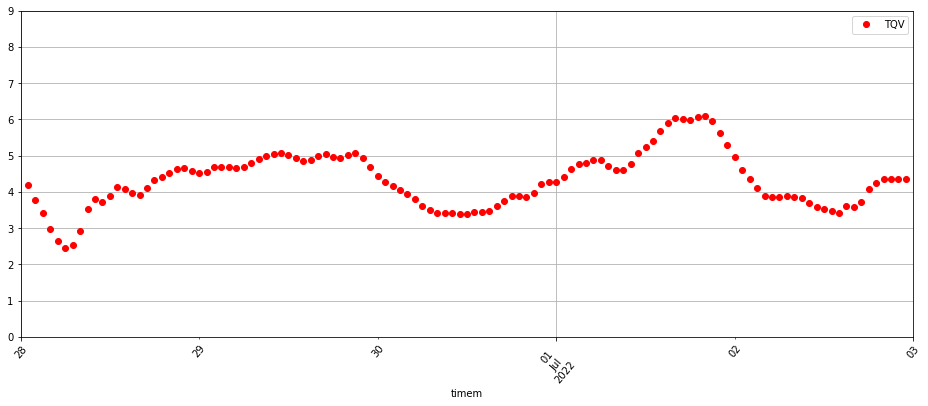

In [37]:
from datetime import datetime
#t1 = pd.DatetimeIndex(data='2022-06-29 00:00:00', '%Y-%m-%d %H:%M:%S')
#t2 = pd.DatetimeIndex(data='2022-07-02 00:00:00', '%Y-%m-%d %H:%M:%S')
t1 = datetime.strptime('2022-06-28 00:00:00', '%Y-%m-%d %H:%M:%S')
t2 = datetime.strptime('2022-07-03 00:00:00', '%Y-%m-%d %H:%M:%S')
#t1 = '2022-06-29 00:00:00'
#t2 = '2022-07-02 00:00:00'
mask_m = (df_m.index > t1) & (df_m.index < t2)
df_mm = df_m.loc[mask_m]
df_mm.plot(y='TQV',ylim=(0,9),color="red",lw=0,marker="o",figsize=(16,6),rot=50,grid=True,xlim=(t1,t2))

<AxesSubplot:xlabel='timem'>

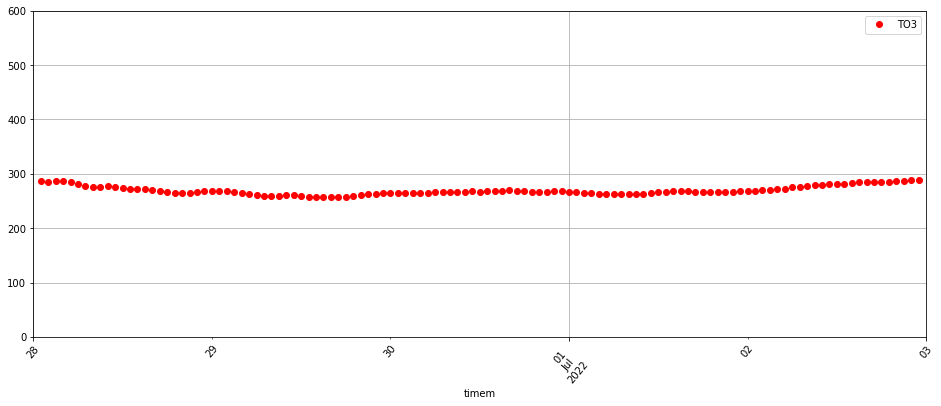

In [48]:
df_mm.plot(y='TO3',ylim=(0,600),color="red",lw=0,marker="o",figsize=(16,6),rot=50,grid=True,xlim=(t1,t2))

## Precipitable water vapor

In [49]:
title=f"Precipitable Water Vapor with filter {filter_name}"

<AxesSubplot:title={'center':'Precipitable Water Vapor with filter FELH0600'}, xlabel='time', ylabel='PWV (mm)'>

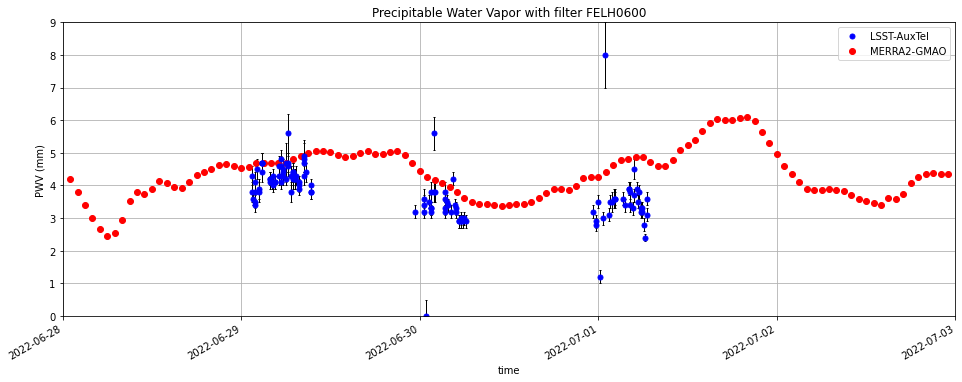

In [50]:
ax=df_extract.plot(y='PWV',yerr="PWV_err",marker='o',lw=0,color='blue',ms=5,ecolor="k",elinewidth=1,capsize = 1, capthick = 1,figsize=(16,6),title=title,xlim=(t1,t2),grid=True,label="LSST-AuxTel")
df_mm.plot(y='TQV',ax=ax,ylim=(0,9),color="red",lw=0,marker="o",grid=True,xlabel="time",ylabel="PWV (mm)",label="MERRA2-GMAO")
#df_extract.plot(y='PWV',yerr="PWV_err",marker='o',lw=0,color='blue',ecolor="k",elinewidth=1,figsize=(10,4))
#OR 
#plt.plot(data.index, data.amount)

In [41]:
#from datetime import datetime
#t1 = pd.DatetimeIndex(data='2022-03-00 00:00:00', '%Y-%m-%d %H:%M:%S')
#t2 = datetime.strptime('2022-04-00 00:00:00', '%Y-%m-%d %H:%M:%S')
#t1 = '2022-03-01 00:00:00'
#t2 = '2022-04-01 00:00:00'
#mask = (df_extract.index > t1) & (df_extract.index < t2)

In [42]:
#df_extract_march = df_extract.loc[mask]

In [43]:
#df_extract_march.plot(y='PWV',marker='o',lw=0,color='blue',figsize=(10,3))

## Aerosols

In [44]:
title=f"Vertical aerosol optical Depth with filter {filter_name}"

<AxesSubplot:title={'center':'Vertical aerosol optical Depth with filter FELH0600'}, xlabel='time'>

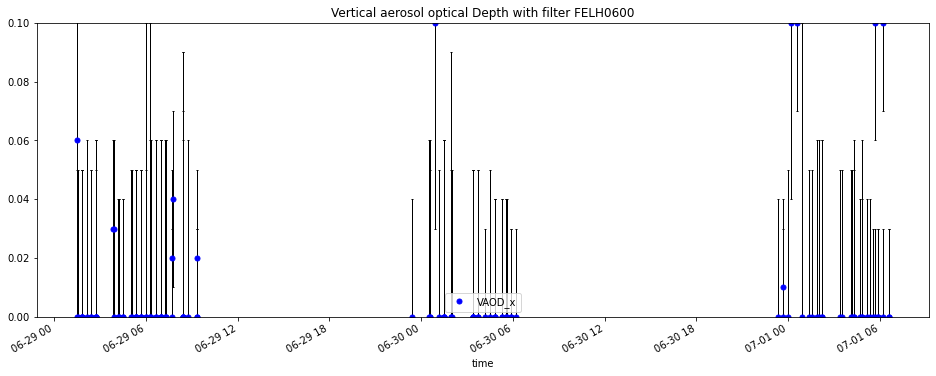

In [45]:
df_extract.plot(y='VAOD_x',yerr='VAOD_err_x',marker='o',lw=0,color='blue',ms=5,figsize=(16,6),ylim=(0,.1),ecolor="k",elinewidth=1,capsize = 1, capthick = 1,title=title)

#OR 
#plt.plot(data.index, data.amount)

## Ozone

In [46]:
title=f"Ozone with filter {filter_name}"

<AxesSubplot:title={'center':'Ozone with filter FELH0600'}, xlabel='time', ylabel='ozone (DbU)'>

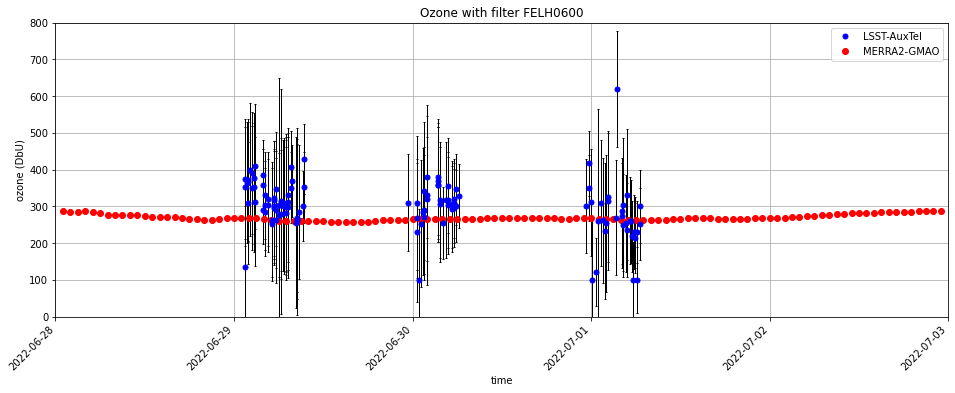

In [47]:
ax=df_extract.plot(y='ozone',yerr="ozone_err",marker='o',lw=0,ecolor="k",color='blue',ms=5,elinewidth=1,capsize = 1, capthick = 1,figsize=(16,6),title=title,grid=True,label="LSST-AuxTel")
df_mm.plot(y='TO3',ax=ax,ylim=(0,800),color="red",lw=0,marker="o",figsize=(16,6),rot=45,grid=True,xlim=(t1,t2),xlabel="time",ylabel="ozone (DbU)",label="MERRA2-GMAO")